<table style="text-align:center; width:100%; border-width:0px;">
    <tbody>
        <tr>
            <td colspan="15"><img src="../figures/milky_way_dcos.png"></td>
            <td colspan="50">
                <span style="font-size:50px;">Formation Channels</span>
                <br>
                <span style="font-size:20px;"><i>Part of the notebook series for Wagg et al. 2021</i></span>
                <br><br>
                <p style="text-align:center; font-size:15px;">This notebook shows how to make the plot of the formation channels from the appendix of Wagg et al. 2021 (Figure 16). In order to make the plot you'll need the data, which can be found <a href="https://zenodo.org/record/4699713">here</a> on Zenodo.</p>
            </td>
            <td colspan="15"><img src="../figures/milky_way_dcos.png"></td>
        </tr>
    </tbody>
</table>

![](../figures/milky_way_dcos.png)

In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import legwork

import sys
sys.path.append("../../simulation/src/")
from variations import variations

import os

# this next bit of code makes plots look nice
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [2]:
dco_types = ["BHBH", "BHNS", "NSNS"]
data_folder = "../../simulation/data/"
sim_folder = data_folder + "simulation/"

# Create formation channels plot

In [3]:
# define the five channels (definitions from Broekgaarden+2021)
channels = np.array([
    {
        "label": "Other",
        "colour": "#808080"
    },
    {
        "label": "Classic",
        "colour": "#118ab2"
    },
    {
        "label": "Only Stable",
        "colour": "#ef476f"
    },
    {
        "label": "Single Core CEE",
        "colour": "#ffd166"
    },
    {
        "label": "Double Core CEE",
        "colour": "#073b4c"
    },
])

# put the other channel last
resort_channels = [1, 2, 3, 4, 0]

<Figure size 864x576 with 0 Axes>

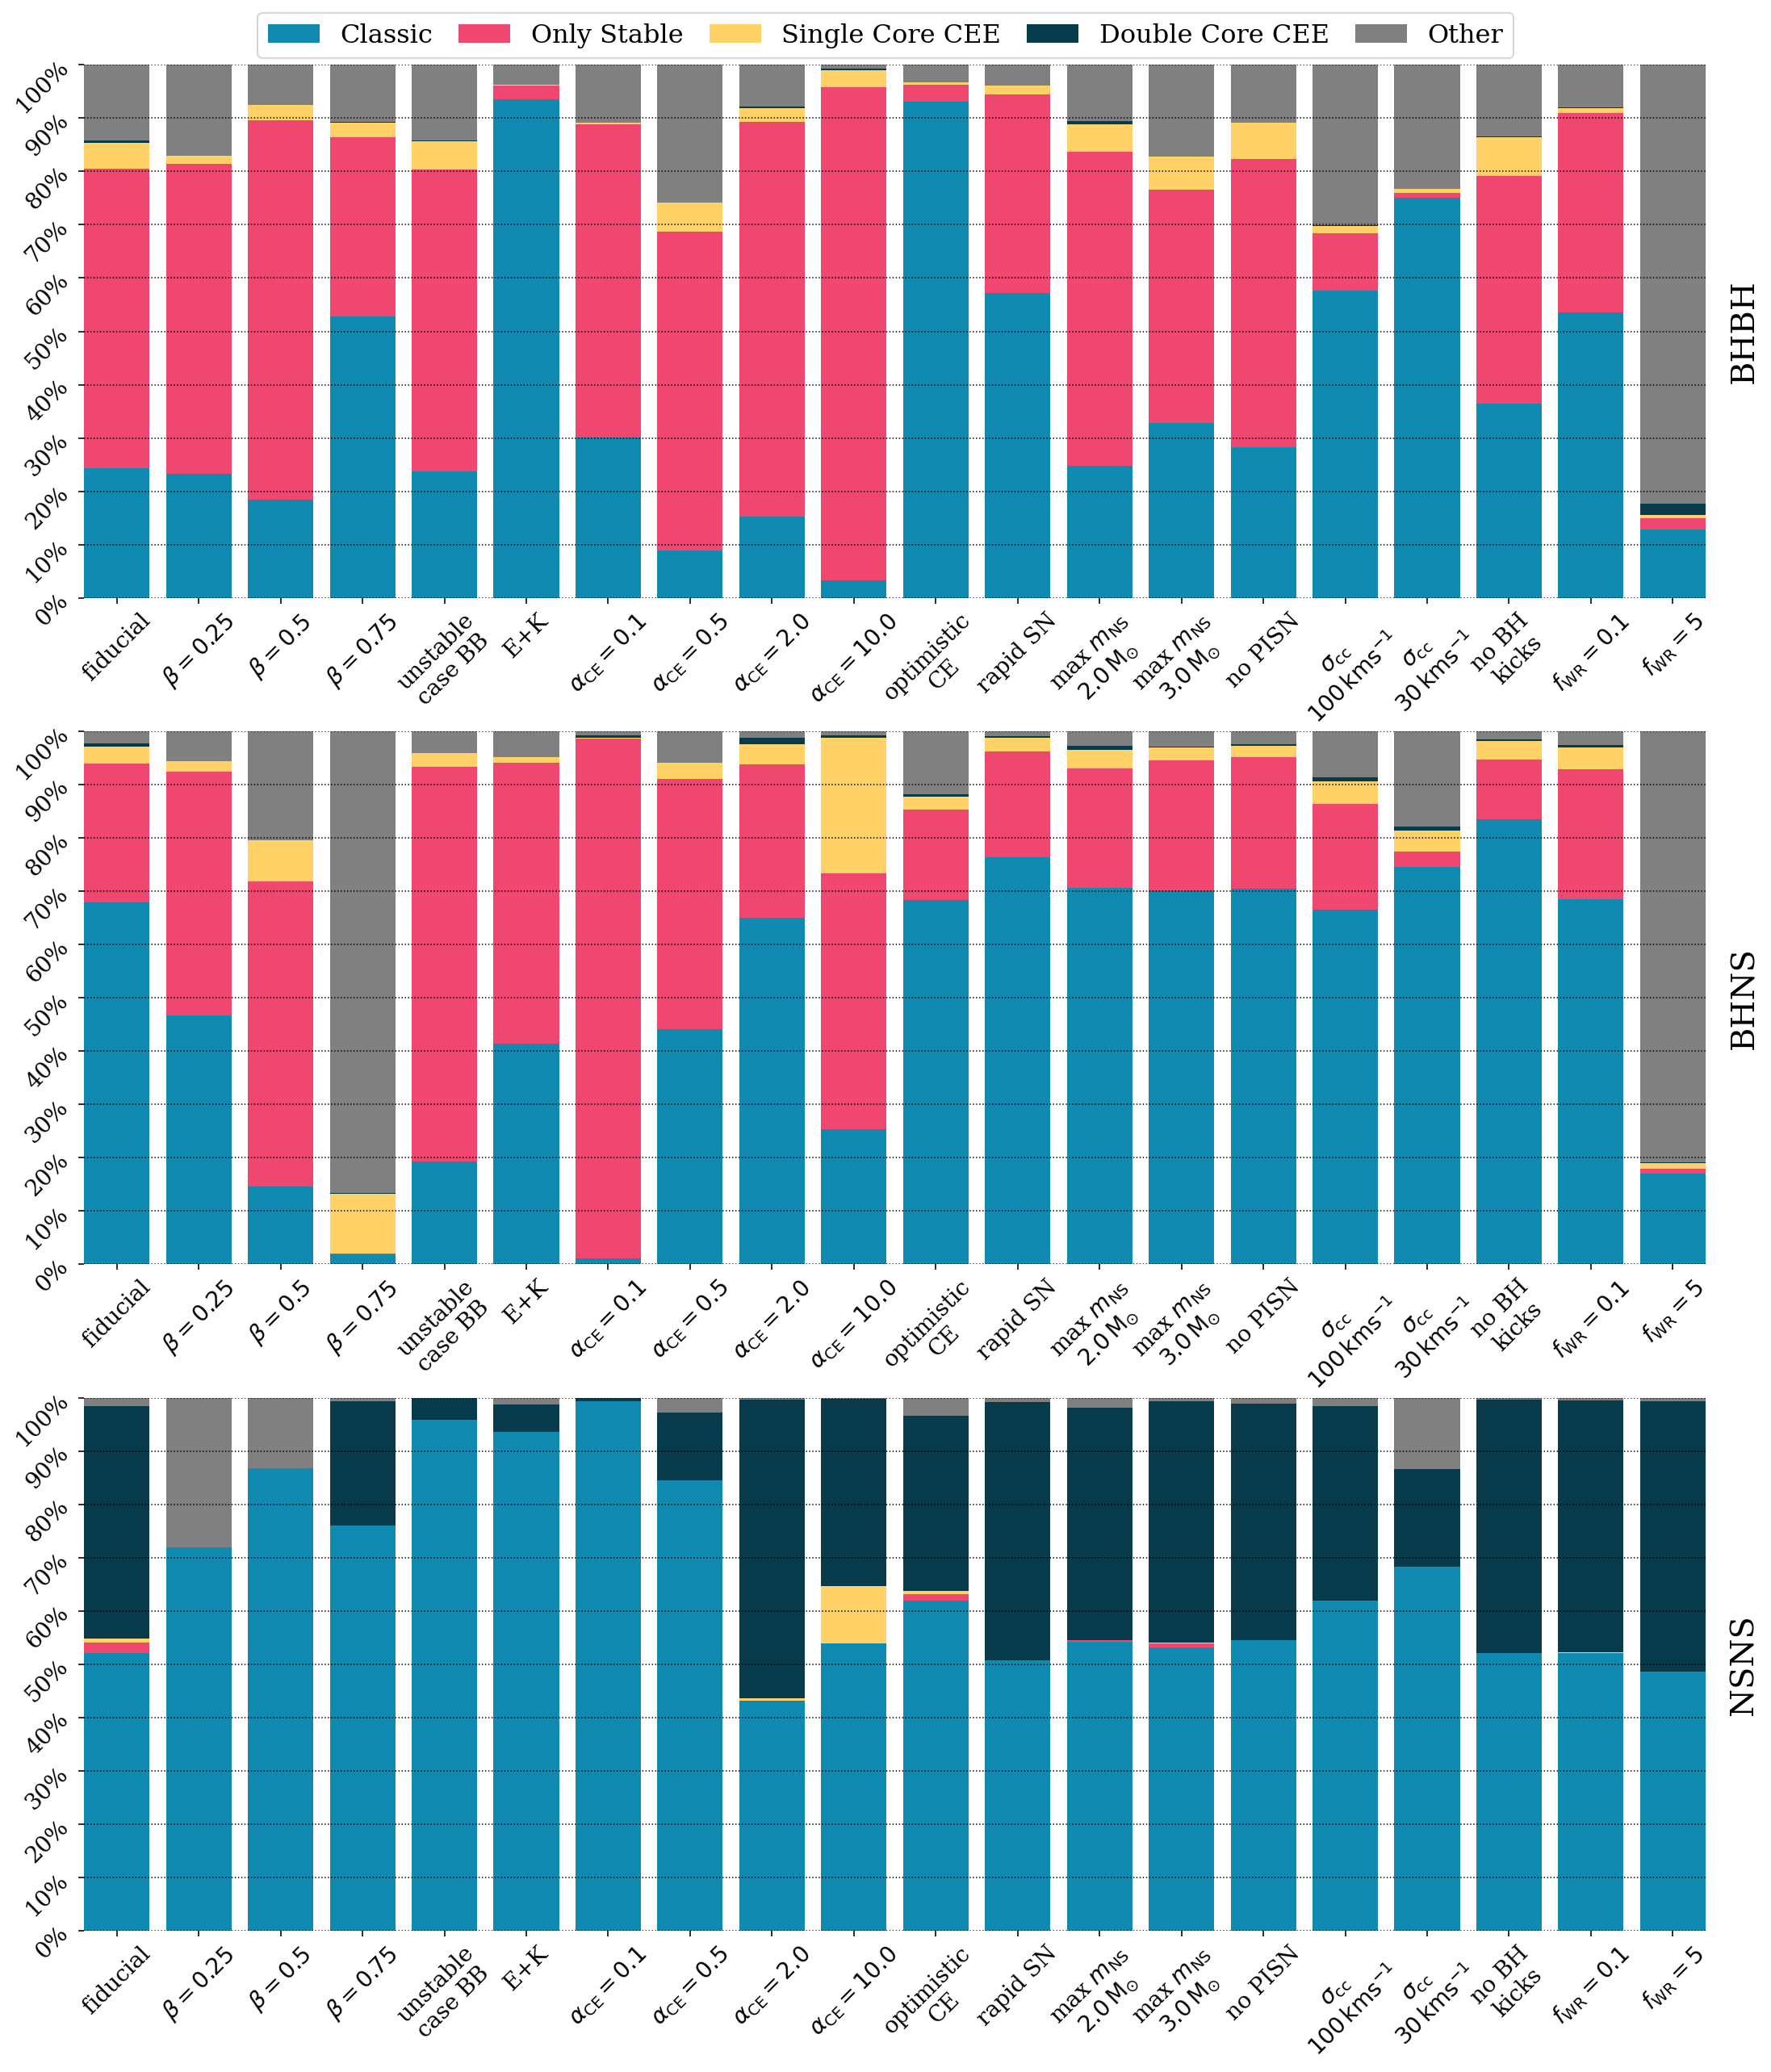

In [4]:
# define some arrays of colours and labels
colours = np.array([channels[c]["colour"] for c in resort_channels])
labels = np.array([channels[c]["label"] for c in resort_channels])

# create a dummy plot with a fake pie chart to get the legend details lazily
fig, ax = plt.subplots()
ax.pie([0.2, 0.2, 0.2, 0.2, 0.2], colors=colours, labels=labels)
handles, leg_labels = ax.get_legend_handles_labels()
plt.clf()

# create the real plot with a panel for each DCO type
fig, axes = plt.subplots(3, 1, figsize=(18, 19))
fig.subplots_adjust(top=0.97, hspace=0.25)

# add the legend using the details that we just calculated
fig.legend(handles, labels, loc='upper center', fontsize=0.8*fs, ncol=5, columnspacing=1.0)

# loop over the DCO types and variations
for i, dco_type in enumerate(dco_types):
    for v in range(len(variations)):
        
        # for each, check the file exists and then get the data
        if os.path.isfile(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"])):
            with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
                data = f["simulation"][...].squeeze()

            # calculate the fraction of systems in each channel
            fractions = np.array([np.sum(data["weight"][data["channel"] == i]) / np.sum(data["weight"])
                                  for i in resort_channels])
            colours = np.array([channels[c]["colour"] for c in resort_channels])
            labels = np.array([channels[c]["label"] for c in resort_channels])

            # make a bar for this DCO type/variation
            axes[i].bar(x=v, height=fractions, color=colours, bottom=np.concatenate(([0], fractions.cumsum()[:-1])))
    
    # ensure the y axis is limited between 0 and 1 and has clean labels
    axes[i].set_ylim(0, 1)
    axes[i].set_yticks(np.arange(0, 1.1, 0.1))
    axes[i].set_yticklabels(["{:1.0f}%".format(x) for x in np.arange(0, 1.1, 0.1) * 100], rotation=45)

    # add some horizontal lines for easier comparison
    for y in np.arange(0, 1.1, 0.1):
        axes[i].axhline(y, color="black", linestyle="dotted", lw=0.75)
    
    # label x axis with physics variations
    axes[i].set_xlim(-0.4, 19.4)
    axes[i].set_xticks(range(len(variations)))
    axes[i].set_xticklabels([variations[v]["med"] for v in range(len(variations))], rotation=45)
    
    # create a fake right axis just to add the DCO label easily
    right_ax = axes[i].twinx()
    right_ax.set_ylabel(dco_type, labelpad=15)
    right_ax.set_yticks([])
    
    # hide the axis frame
    for axis in [axes[i], right_ax]:
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
plt.savefig("../figures/formation_channels.pdf", format="pdf", bbox_inches="tight")
    
plt.show()